**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 1: Data Preparation*

# Identification

Name: Tony Adams Waffo<br/>
Student Number: 300310088

# Exploratory Analysis

## Import important libraries

In [15]:
# Your code goes here
import pandas as pd

## Read Dataset

As outlined in the project description, it should be possible for the correctors to ecute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, use the data ovided in the public GitHub repository and provide a link to the raw version of the taset.

The link to the raw version is as follows:

*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.v*

For example:

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv]ttps://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Now provide the link to YOUR dataset and read the dataset:

In [16]:
urls = [
    "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/01/glass.csv",
    "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/02/dermatology_database_1.csv",
    "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv",
    "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/04/car.data",
    "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/05/WineQT.csv",
    "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/06/16P.csv",
    "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/07/test.csv"
]

dataframes=[]

for url in urls:
    try:
        # Try reading the CSV file with utf-8 encoding first
        dset = pd.read_csv(url)
    except UnicodeDecodeError:
        # If utf-8 fails, try with a different encoding (like 'latin1')
        dset = pd.read_csv(url, encoding='latin1')
    
    dataframes.append(dset)

# Display the first few rows of the datasets to verify loading
for idx, df in enumerate(dataframes):
    print(f"Dataset {idx + 1}:")
    print(df.head())

Dataset 1:
   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type of glass
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0              1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0              1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0              1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0              1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0              1
Dataset 2:
   erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0            


## 1. Analysis of Missing Values

### 1.1. Datasets Containing Missing Values

The following datasets contain missing values:

- **Dataset 2**:
  - Attribute missing: `age`
  
- **Dataset 6**:
  - Attributes missing: `name`, `Monthly_Inhand_Salary`, `Type_of_Loan`, `Num_of_Delayed_Payment`, `Num_Credit_Inquiries`, `Credit_History_Age`, `Amount_invested_monthly`, `Monthly_Balance`

### 1.2. Methodology for Investigating Missing Values

To identify missing values in the datasets, each dataset was loaded into a DataFrame. The following approach was used:

- The `isnull()` method was applied to check for missing values.
- The `sum()` method was used to count the number of missing values for each attribute.

The code below will help you understand how missing values were identified in the datasets

In [17]:
# Your code goes here
for index, dataset in enumerate(dataframes):
    # Identify missing values
    missing_values = dataset.isnull().sum()

    # Replace '?' with NaN if necessary
    dataset.replace(['?', ''], pd.NA, inplace=True)

    # Check again for missing values
    missing_values_updated = dataset.isnull().sum()

    # Only print if there are missing values
    if missing_values_updated[missing_values_updated > 0].any():
        print(f"Dataset {index + 1} contains missing values in the following attributes:")
        print(missing_values_updated[missing_values_updated > 0])
        print("\n")

Dataset 2 contains missing values in the following attributes:
age    8
dtype: int64


Dataset 7 contains missing values in the following attributes:
Name                       5015
Monthly_Inhand_Salary      7498
Type_of_Loan               5704
Num_of_Delayed_Payment     3498
Num_Credit_Inquiries       1035
Credit_History_Age         4470
Amount_invested_monthly    2271
Monthly_Balance             562
dtype: int64




### 1.3. Imputation Strategies for Missing Values

To address the missing values in the datasets effectively, the following imputation strategies are proposed:

- **`age` in dataset 2**:
  - **Recommended Strategy**: Use **median imputation**. This approach minimizes the influence of outliers, resulting in a more robust estimate of central tendency.

- **`Name` in dataset 6**:
  - **Recommended Strategy**: Substitute missing values with a placeholder such as **"Unknown"** or **"Not Provided."** This maintains the dataset's integrity while avoiding the introduction of potentially misleading assumptions.

- **`Monthly_Inhand_Salary` in dataset 6**:
  - **Recommended Strategy**: Use **median imputation**. Given the potential skewness in salary distributions, the median provides a more reliable central value compared to the mean.

- **`Type_of_Loan` in dataset 6**:
  - **Recommended Strategy**: Replace missing values with the **mode** (the most frequently occurring loan type). This preserves categorical integrity and ensures that missing values are handled thoughtfully.

- **`Num_of_Delayed_Payment` in dataset 6**:
  - **Recommended Strategy**: Use **median imputation.** This strategy is preferred due to the likelihood of outliers affecting the mean.

- **`Num_Credit_Inquiries` in dataset 6**:
  - **Recommended Strategy**: Implement **median imputation.** This method helps to accurately reflect the distribution of inquiries, especially if outliers are present.

- **`Credit_History_Age` in dataset 6**:
  - **Recommended Strategy**: Utilize **median imputation.** This choice offers robustness against extreme values that may distort the mean.

- **`Amount_invested_monthly` in dataset 6**:
  - **Recommended Strategy**: Opt for **median imputation.** This approach provides a more stable estimate for investment amounts.

- **`Monthly_Balance` in dataset 6**:
  - **Recommended Strategy**: Apply **median imputation.** This method is suitable given the small number of missing values and helps preserve data quality.


The recommended strategies focus on using median imputation for numerical features due to its robustness against outliers, while placeholders are suggested for categorical attributes to maintain dataset integrity. This approach aims to enhance the overall quality of the data and the effectiveness of subsequent analyses.


## 2. Select and Familiarize Yourself with a Classification Task

### Dataset Description: Wine Quality Dataset

#### Justification for Choice of Dataset:
I recently developed an interest in wine and wanted to learn how to identify good-quality wines based on their characteristics. This dataset provides an excellent opportunity to explore the chemical properties that contribute to wine quality, which aligns with my curiosity about how to choose and assess wines more effectively.

#### Dataset Overview:
- **Number of samples**: 4898
- **Number of attributes**: 12
- **Number of classes (target)**: 11 (wine quality ratings from 0 to 10)

This dataset contains chemical properties of 4898 white wine samples, each rated by experts for quality on a scale of 0 to 10. It’s a great dataset for learning classification and regression, as the goal is to predict the wine quality based on its chemical attributes.

#### Attributes and Target Definition:
- **Fixed Acidity**: Acidity contributes to tartness.
- **Volatile Acidity**: High levels can cause a vinegar-like taste.
- **Citric Acid**: Adds freshness.
- **Residual Sugar**: Remaining sugar affects sweetness.
- **Chlorides**: Influences flavor and preservation.
- **Free & Total Sulfur Dioxide**: Prevents spoilage and oxidation.
- **Density**: Related to body and texture.
- **pH**: Measures acidity.
- **Sulphates**: Affects aroma and preservation.
- **Alcohol**: Influences flavor, aroma, and texture.
-**id**: A unique identifier for each sample

#### Target Variable:
- **Quality**: A score from 0 to 10 representing the wine’s overall quality.

By analyzing the relationship between these chemical features and quality ratings, this dataset provides valuable insights into what makes a wine great.

### 2.1 What is the Objective of the Task? Is it Intended for a Specific Application? Do You Possess Expertise in This Particular Domain of Application?

- **Objective**: The primary objective of the **wine quality dataset** is to classify the quality of wine based on its chemical properties. Each sample in the dataset is rated on a scale from **0 to 10**, where the quality rating is determined by various physicochemical tests.

- **Application**: 
  - This classification task is particularly relevant for the **wine industry**, where it can assist winemakers in understanding which chemical properties contribute to **higher quality wines**.
  - It can also be valuable for **consumers** who are interested in selecting wines that offer better taste profiles or are potentially healthier.
  
- **Domain Expertise**: While I'm not an expert in oenology (the study of wine), I find the dataset offers a valuable foundation for exploring the relationship between wine quality and its chemical characteristics. I believe that understanding these factors can deepen my knowledge of how wine impacts health


## 3. Attribute Analysis


### 3.1 Determine Which Attributes Lack Informativeness

- All attributes, except for the **ID** attribute, are likely informative and should be retained for the machine learning analysis. The ID attribute does not carry any useful information for predicting wine quality, so it should be excluded. Other features provide important insights into the chemical properties of the wine and are relevant for the classification task.


### 3.2 Distribution of Each Attribute

The following steps include generating **histograms** and **boxplots** to observe the distribution of each attribute (column) within the dataset to identify underlying patterns or outliers


<Figure size 1500x1200 with 0 Axes>

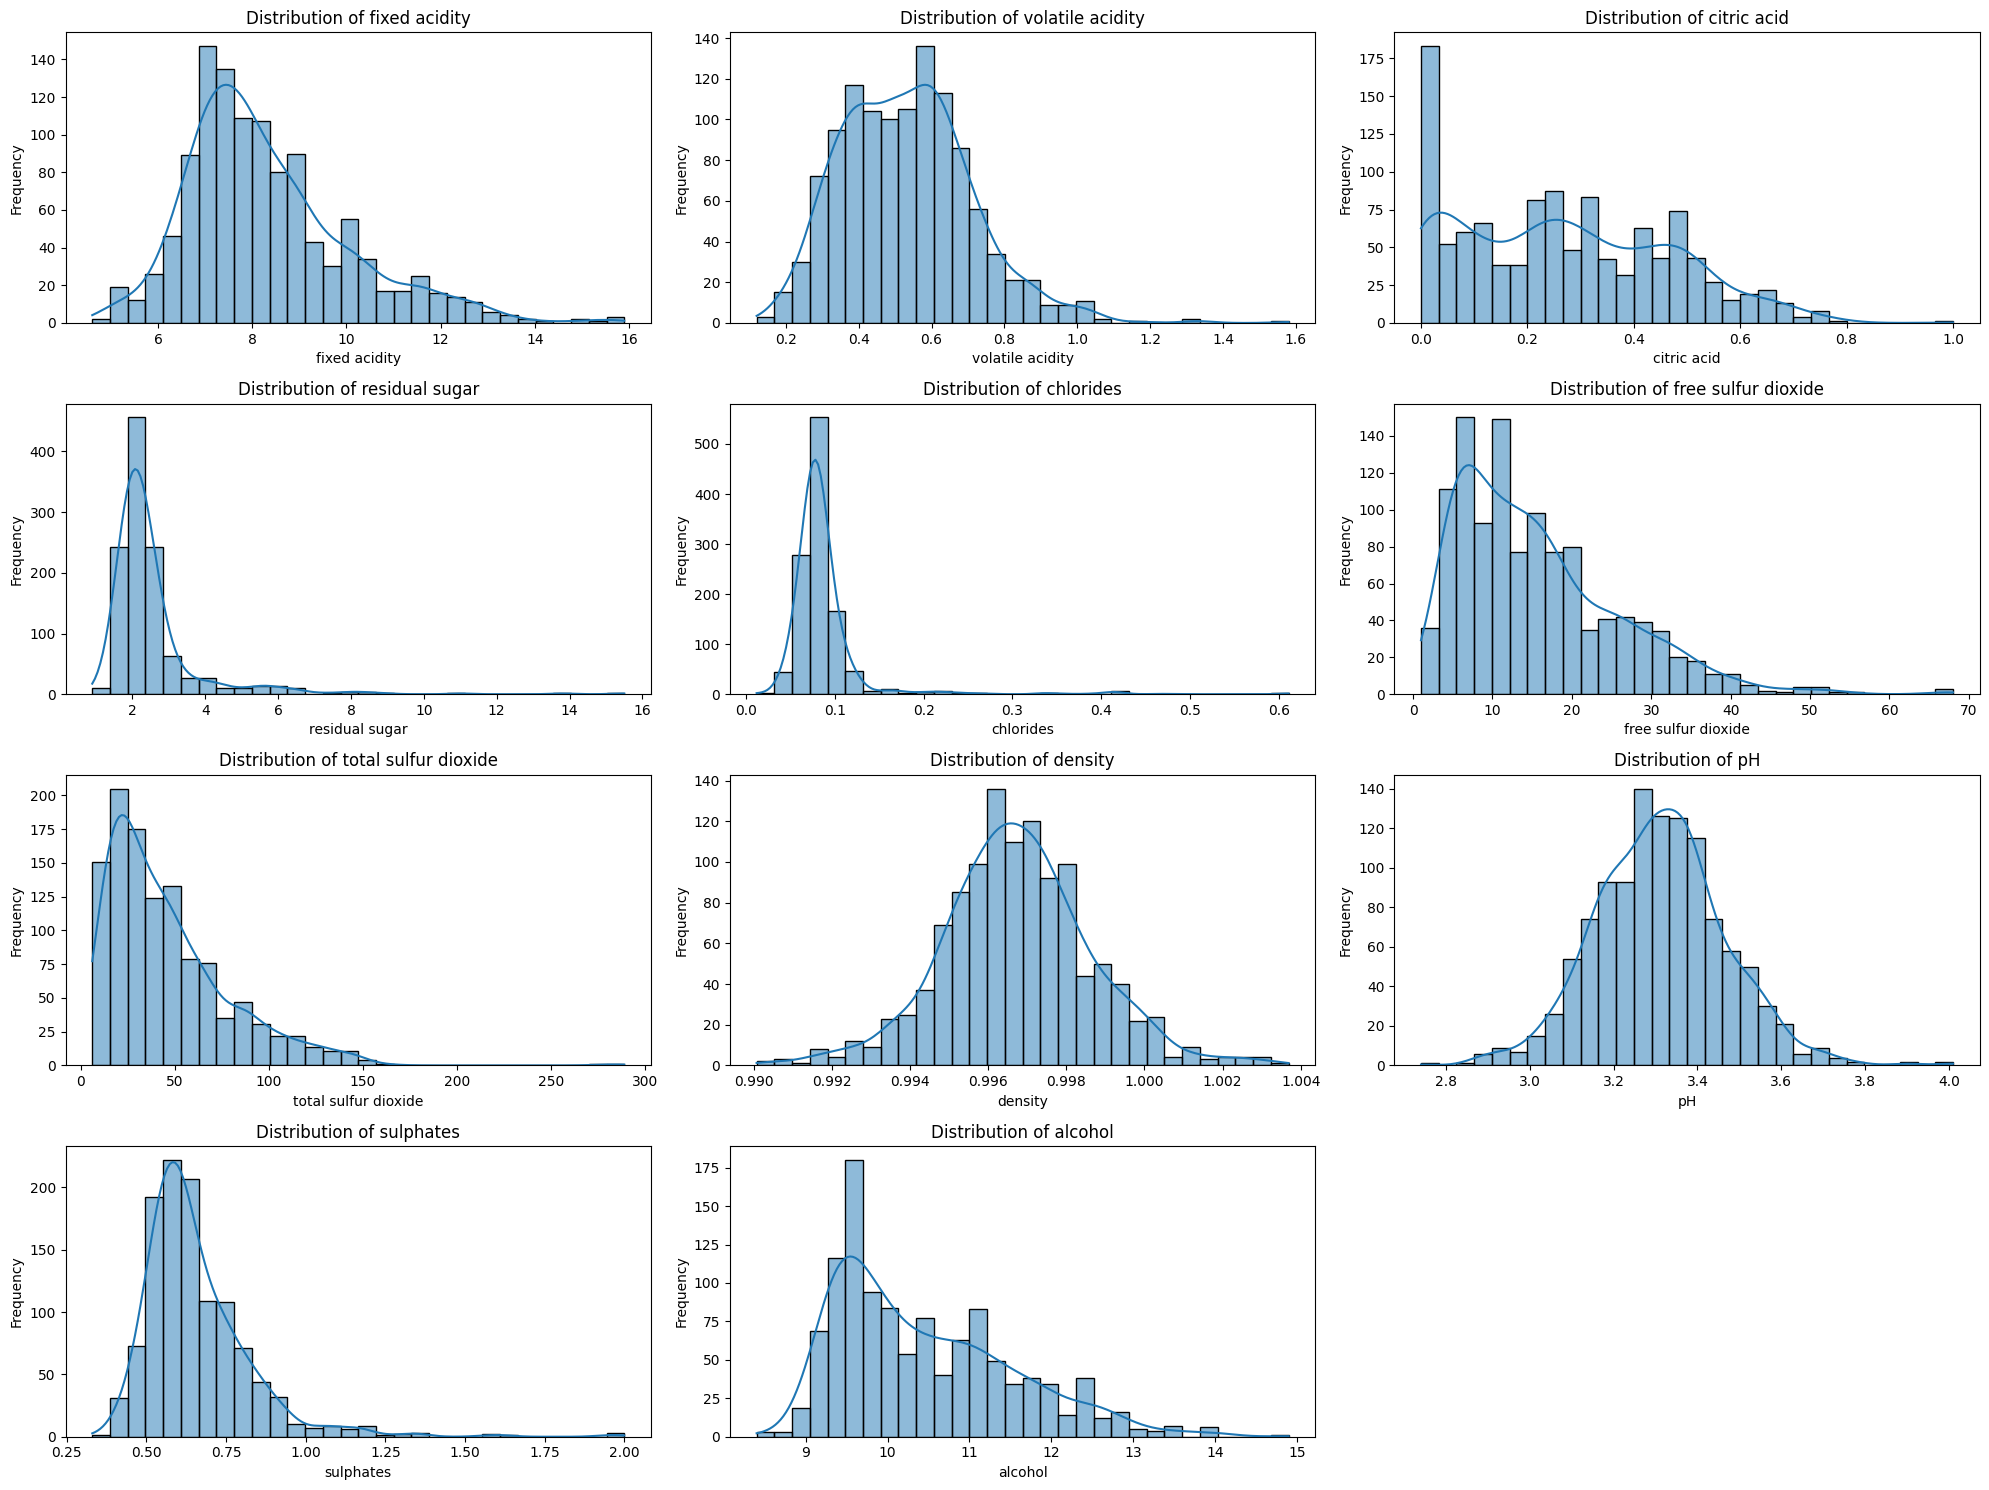

In [18]:
# Your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/05/WineQT.csv")

# Drop the 'Id' column
data = data.drop(columns=['Id',"quality"])

# Set up the plotting environment
plt.figure(figsize=(15, 12))

# Get all column names except the first one if it's an index column
attributes = data.columns

# Histograms to examine the distribution
plt.figure(figsize=(20, 15))
num_attributes = len(attributes)  # Get the total number of attributes
rows = (num_attributes // 3) + (num_attributes % 3 > 0)  # Calculate number of rows needed

for i, attribute in enumerate(attributes):
    plt.subplot(rows, 3, i + 1)
    sns.histplot(data[attribute], bins=30, kde=True)
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Here is the boxplots to identify outliers

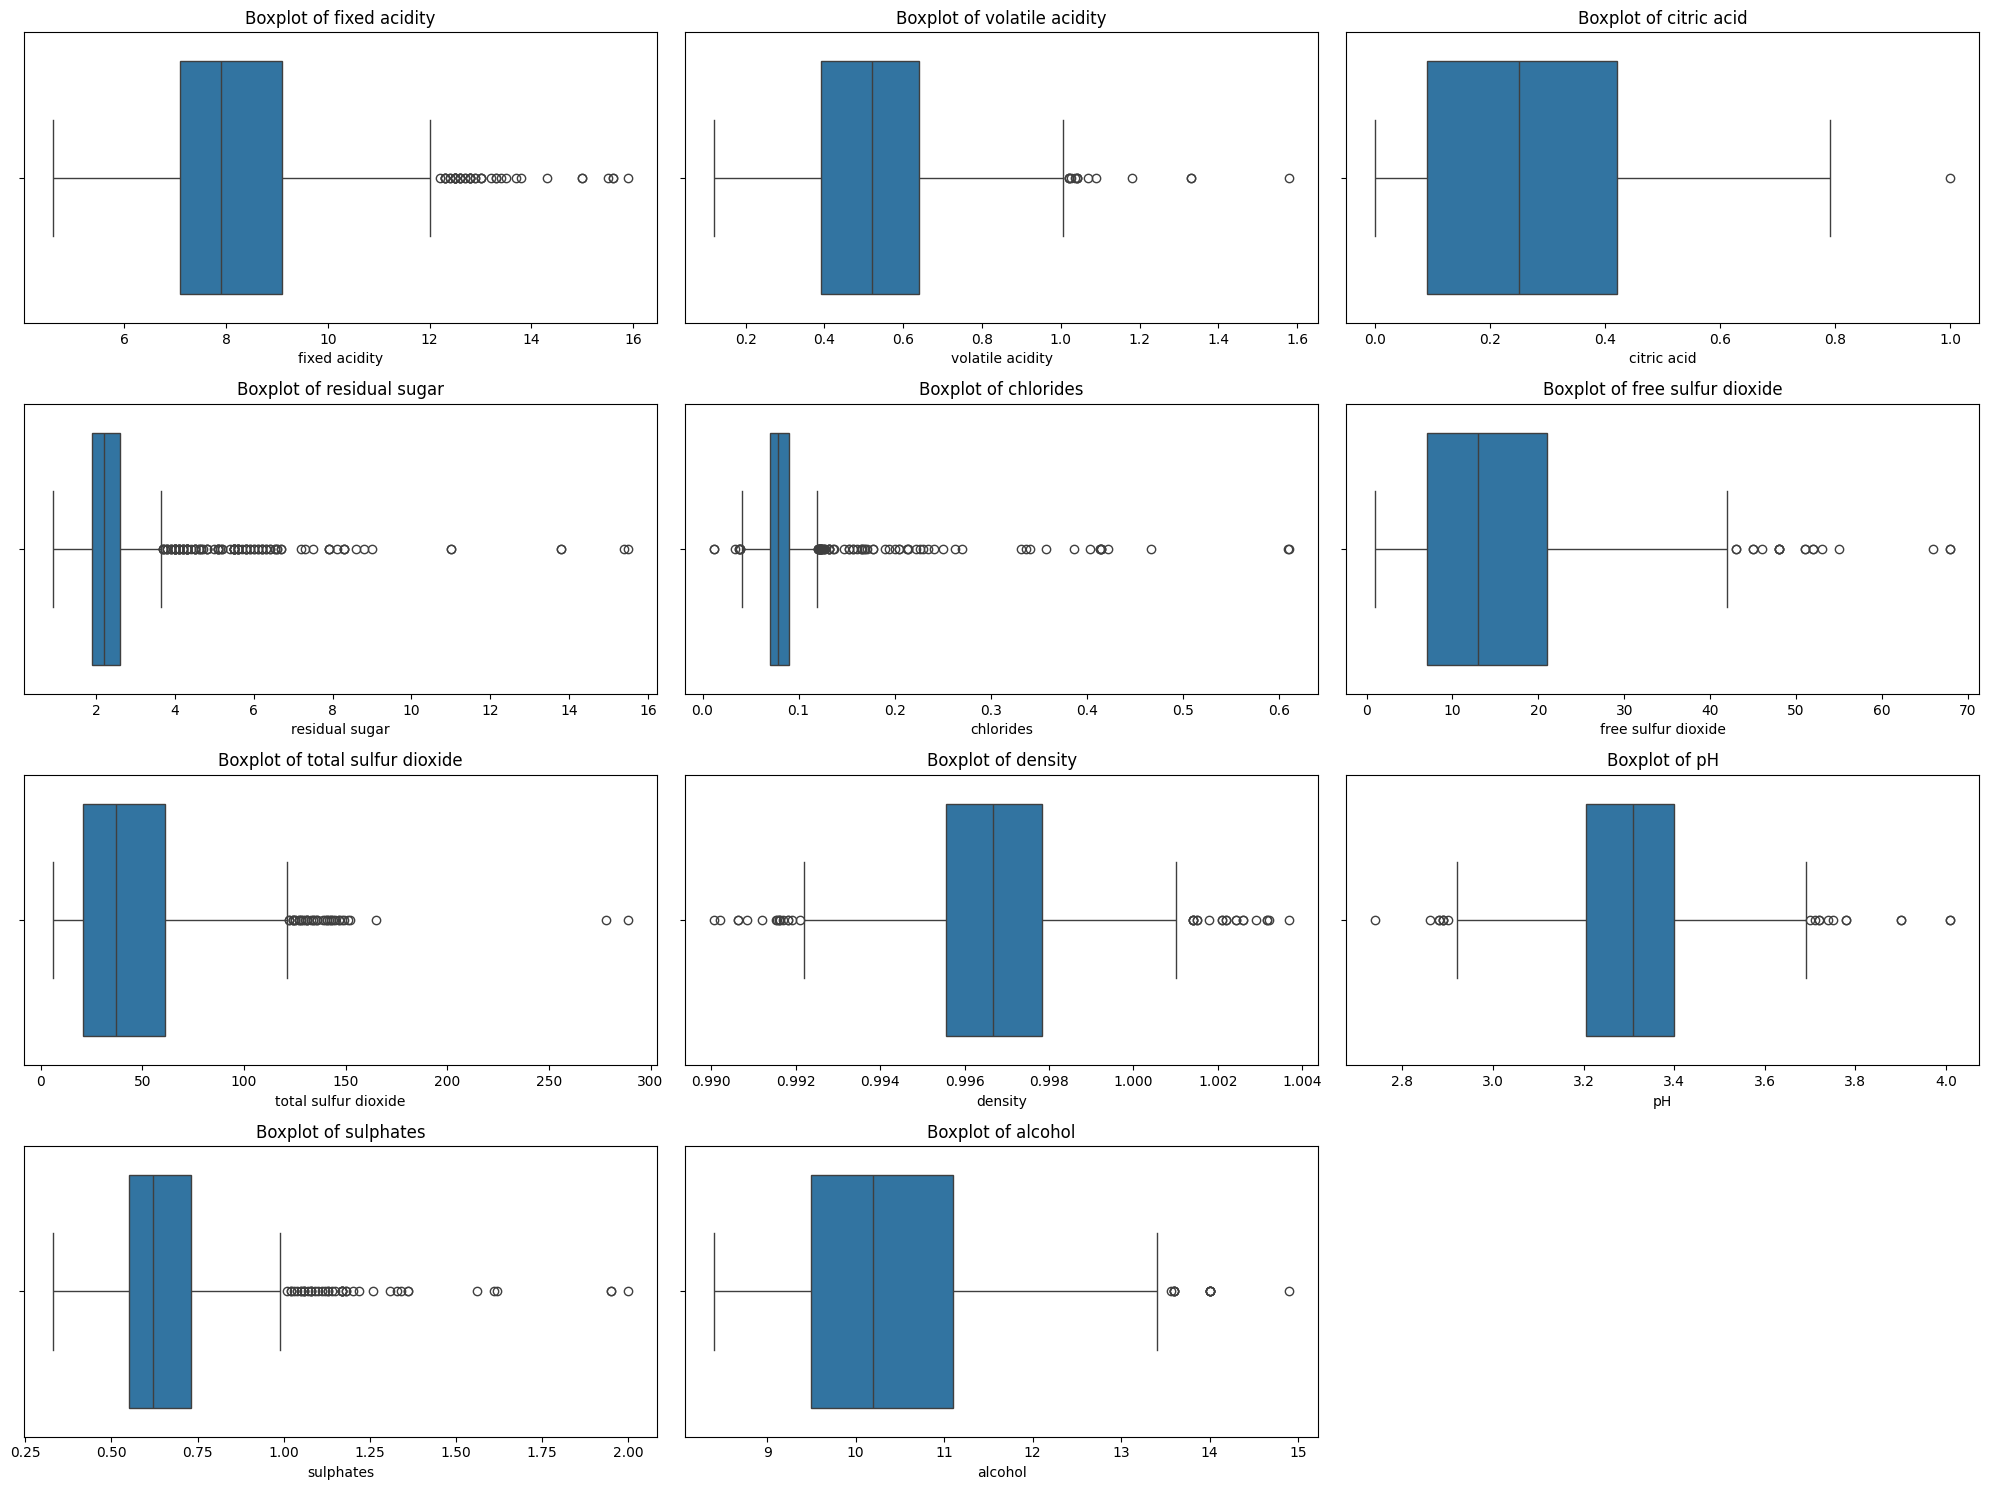

In [19]:
# Boxplots to identify outliers
plt.figure(figsize=(20, 15))
for i, attribute in enumerate(attributes):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(x=data[attribute])
    plt.title(f'Boxplot of {attribute}')
    
plt.tight_layout()
plt.show()

### 4. Class Distribution Analysis
To Investigate the distribution of class labels within the dataset, we are employing bar plots to visualize the frequency of instances for each class, and assess whether the dataset is balanced or imbalanced.

C:\Users\Tony\AppData\Local\Temp\ipykernel_36652\129692663.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quality_counts.index, y=quality_counts.values, palette="viridis")


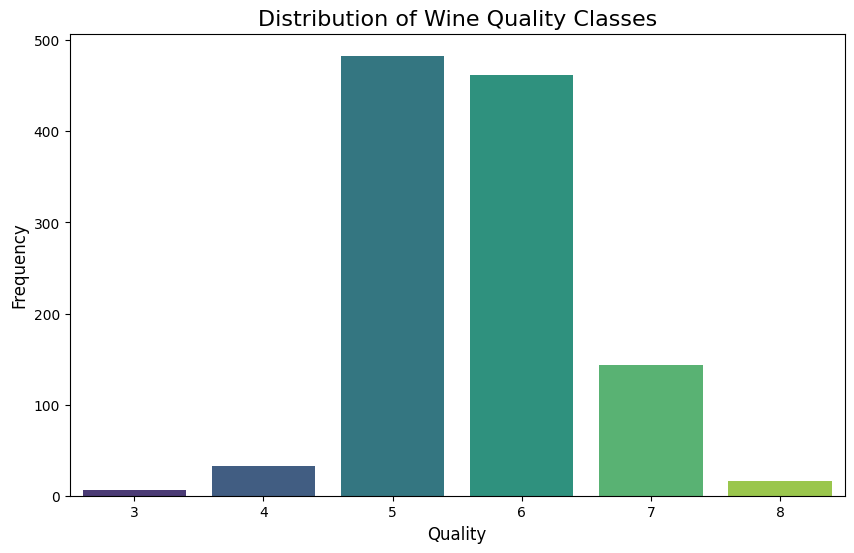

In [20]:
# Load the dataset again to have the "quality" column
data = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/05/WineQT.csv")

# Investigate the distribution of class labels (quality column)
quality_counts = data['quality'].value_counts()

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a bar plot of class distributions
sns.barplot(x=quality_counts.index, y=quality_counts.values, palette="viridis")

# Add titles and labels
plt.title('Distribution of Wine Quality Classes', fontsize=16)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

**Dataset Imbalance Analysis**

After executing the code, we obtained a bar plot illustrating the distribution of instances for each wine quality rating (ranging from 0 to 10). The analysis of the plot reveals the following characteristics:

- **Quality Ratings**:
  - Ratings **5, 6, and 7** have significantly higher frequencies, indicating that a large number of instances fall within this middle quality range.
  - Ratings **0, 1, 2, 9 and 10** are almost non-existent, suggesting that very few wines have been rated as poor quality.
  - Ratings **3,4** and **8** have low occurrences, indicating they are less common but not entirely absent.


The observed distribution indicates that the dataset is imbalanced, with a concentration of instances around the middle quality ratings (5-7) and a stark lack of representation for extreme ratings. This imbalance can potentially affect the performance of machine learning models, leading to biases favoring the more prevalent quality ratings.

## 5. Preprocessing

### 5.1 Transformation for Numerical Features
For numerical features, determine the best transformation to use. Indicate e transformation that seems appropriate and why. Include the code illustrating how  apply the transformation. For at least one attribute, show the distribution before d after the transformation. See [Preprocessing data](https://scikit-learn.org/able/modules/preprocessing.html).

For numerical features, applying the right transformation can significantly enhance the performance of machine learning models. 
A common transformation for them is the **Log Transformation**. This transformation is especially useful when dealing with skewed data distributions, as it helps in:

- **Reducing Skewness**: Log transformation can normalize the distribution, making it more symmetric.
- **Handling Outliers**: It compresses the range of large values, mitigating the impact of outliers.

It ensures that there are no zero or negative values in the dataset when applying a log transformation.


I will apply the log transformation to the **residual sugar** attribute in the dataset. This transformation is expected to normalize the distribution of the residual sugar values, reduce skewness, and help mitigate the impact of any outliers present in the data.

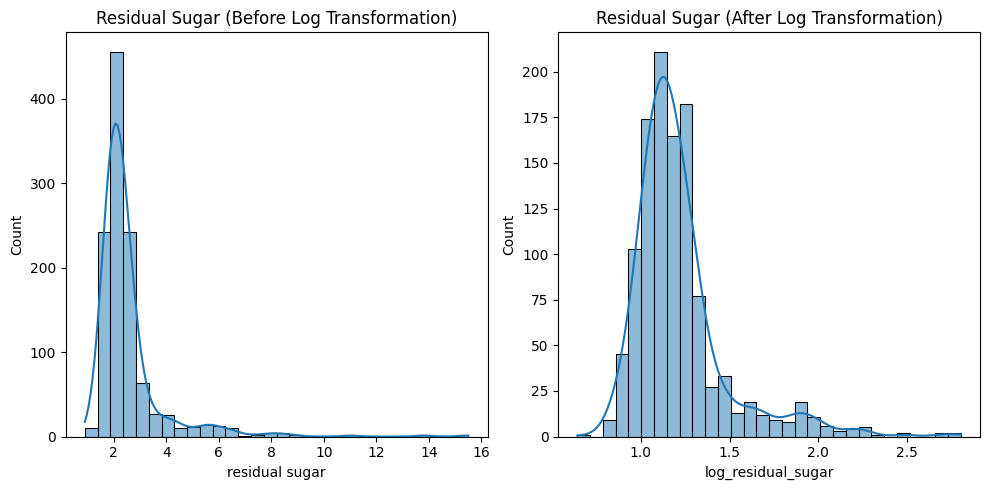

In [21]:
import numpy as np

# Plot the distribution of the 'residual sugar' attribute before transformation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['residual sugar'], bins=30, kde=True)
plt.title('Residual Sugar (Before Log Transformation)')

# Apply the log transformation to 'residual sugar' (adding 1 to avoid log(0))
data['log_residual_sugar'] = np.log1p(data['residual sugar'])

# Plot the distribution of the 'log_residual_sugar' attribute after transformation
plt.subplot(1, 2, 2)
sns.histplot(data['log_residual_sugar'], bins=30, kde=True)
plt.title('Residual Sugar (After Log Transformation)')

plt.tight_layout()
plt.show()


**Explanation**:
I plotted the distribution of the residual sugar attribute and observed a positive skew, indicating the need for transformation. To address this, I applied the log transformation using np.log1p(), which effectively managed zero values and compressed the range of high values, reducing the influence of outliers. After transformation, the distribution appeared more symmetrical and normalized, demonstrating the transformation's effectiveness. Log transformation is particularly beneficial for positively skewed data as it mitigates outliers' impact, enhancing the dataset's suitability for machine learning models and improving overall model performance.

### 5.2 For categorical features, show how to apply [one-hot encoding](https://ikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). 


Since the wine dataset doesn’t have categorical features (only numerical ones), we will apply one-hot encoding to the target variable (wine quality).

Here’s how to apply one-hot encoding to the target variable quality:

In [22]:
from sklearn.preprocessing import OneHotEncoder

# Reshape the 'quality' column to a 2D array for one-hot encoding
quality = data['quality'].values.reshape(-1, 1)

# Initialize the one-hot encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'quality' column
quality_encoded = encoder.fit_transform(quality)

# Convert the encoded data into a DataFrame for better readability
quality_encoded_df = pd.DataFrame(quality_encoded, columns=[f'quality_{int(i)}' for i in encoder.categories_[0]])

# Concatenate the original dataset with the encoded 'quality' DataFrame
data_encoded = pd.concat([data, quality_encoded_df], axis=1)

# Display the first few rows of the encoded dataset
print(data_encoded.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  log_residual_sugar  quality_3  quality_4  quality_5  \
0     

## 6.Training and target data
Set the Python variable `X` to designate the data and `y` to designate the target class. Make sure to select only the informative features.

In [23]:

# Drop the non-informative ID column if it exists
# Assuming 'id' is a non-informative feature, remove it
data = data.drop(columns=['id'], errors='ignore')

# Select the informative features for X (all except 'quality')
X = data.drop(columns=['quality'])

# Set the target variable y (quality)
y = data['quality']

# Display the first few rows to verify
print("Training Data (X):")
print(X.head())

print("\nTarget Class (y):")
print(y.head())


Training Data (X):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Id  log_residual_sugar  
0      9.4   0            1.06

## 7. Training and test sets
Split the dataset into training and testing sets. Reserve 20% of data for testing.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
# Select the informative features for X (all except 'quality')
X = data.drop(columns=['quality'])

# Set the target variable y (quality)
y = data['quality']
# 80% training data, 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_rep)


Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.22      0.33      0.27         6
           5       0.62      0.62      0.62        96
           6       0.57      0.47      0.52        99
           7       0.44      0.69      0.54        26
           8       0.00      0.00      0.00         2

    accuracy                           0.55       229
   macro avg       0.31      0.35      0.32       229
weighted avg       0.57      0.55      0.55       229



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMet

--------------------------------------------------------------------------

# References

https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/#:~:text=Seven%20Ways%20to%20Make%20up%20Data%3A%20Common%20Methods,regression%20imputation%20...%207%20Interpolation%20and%20extrapolation%20

https://www.datacamp.com/tutorial/one-hot-encoding-python-tutorial

https://scikit-learn.org/1.5/modules/preprocessing.html#preprocessing

https://www.wineinvestment.com/learn/magazine/2019/05/understanding-the-five-basic-characteristics-of-wine/#:~:text=Understanding%20the%20five%20basic%20characteristics%20of%20wine%201,4%204%29%20Alcohol%20...%205%205%29%20Body%20

Courses lectures


## AI transcript
**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".